<a href="https://colab.research.google.com/github/maaz44hello/-gbbg/blob/main/class117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix

A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarised with count values.


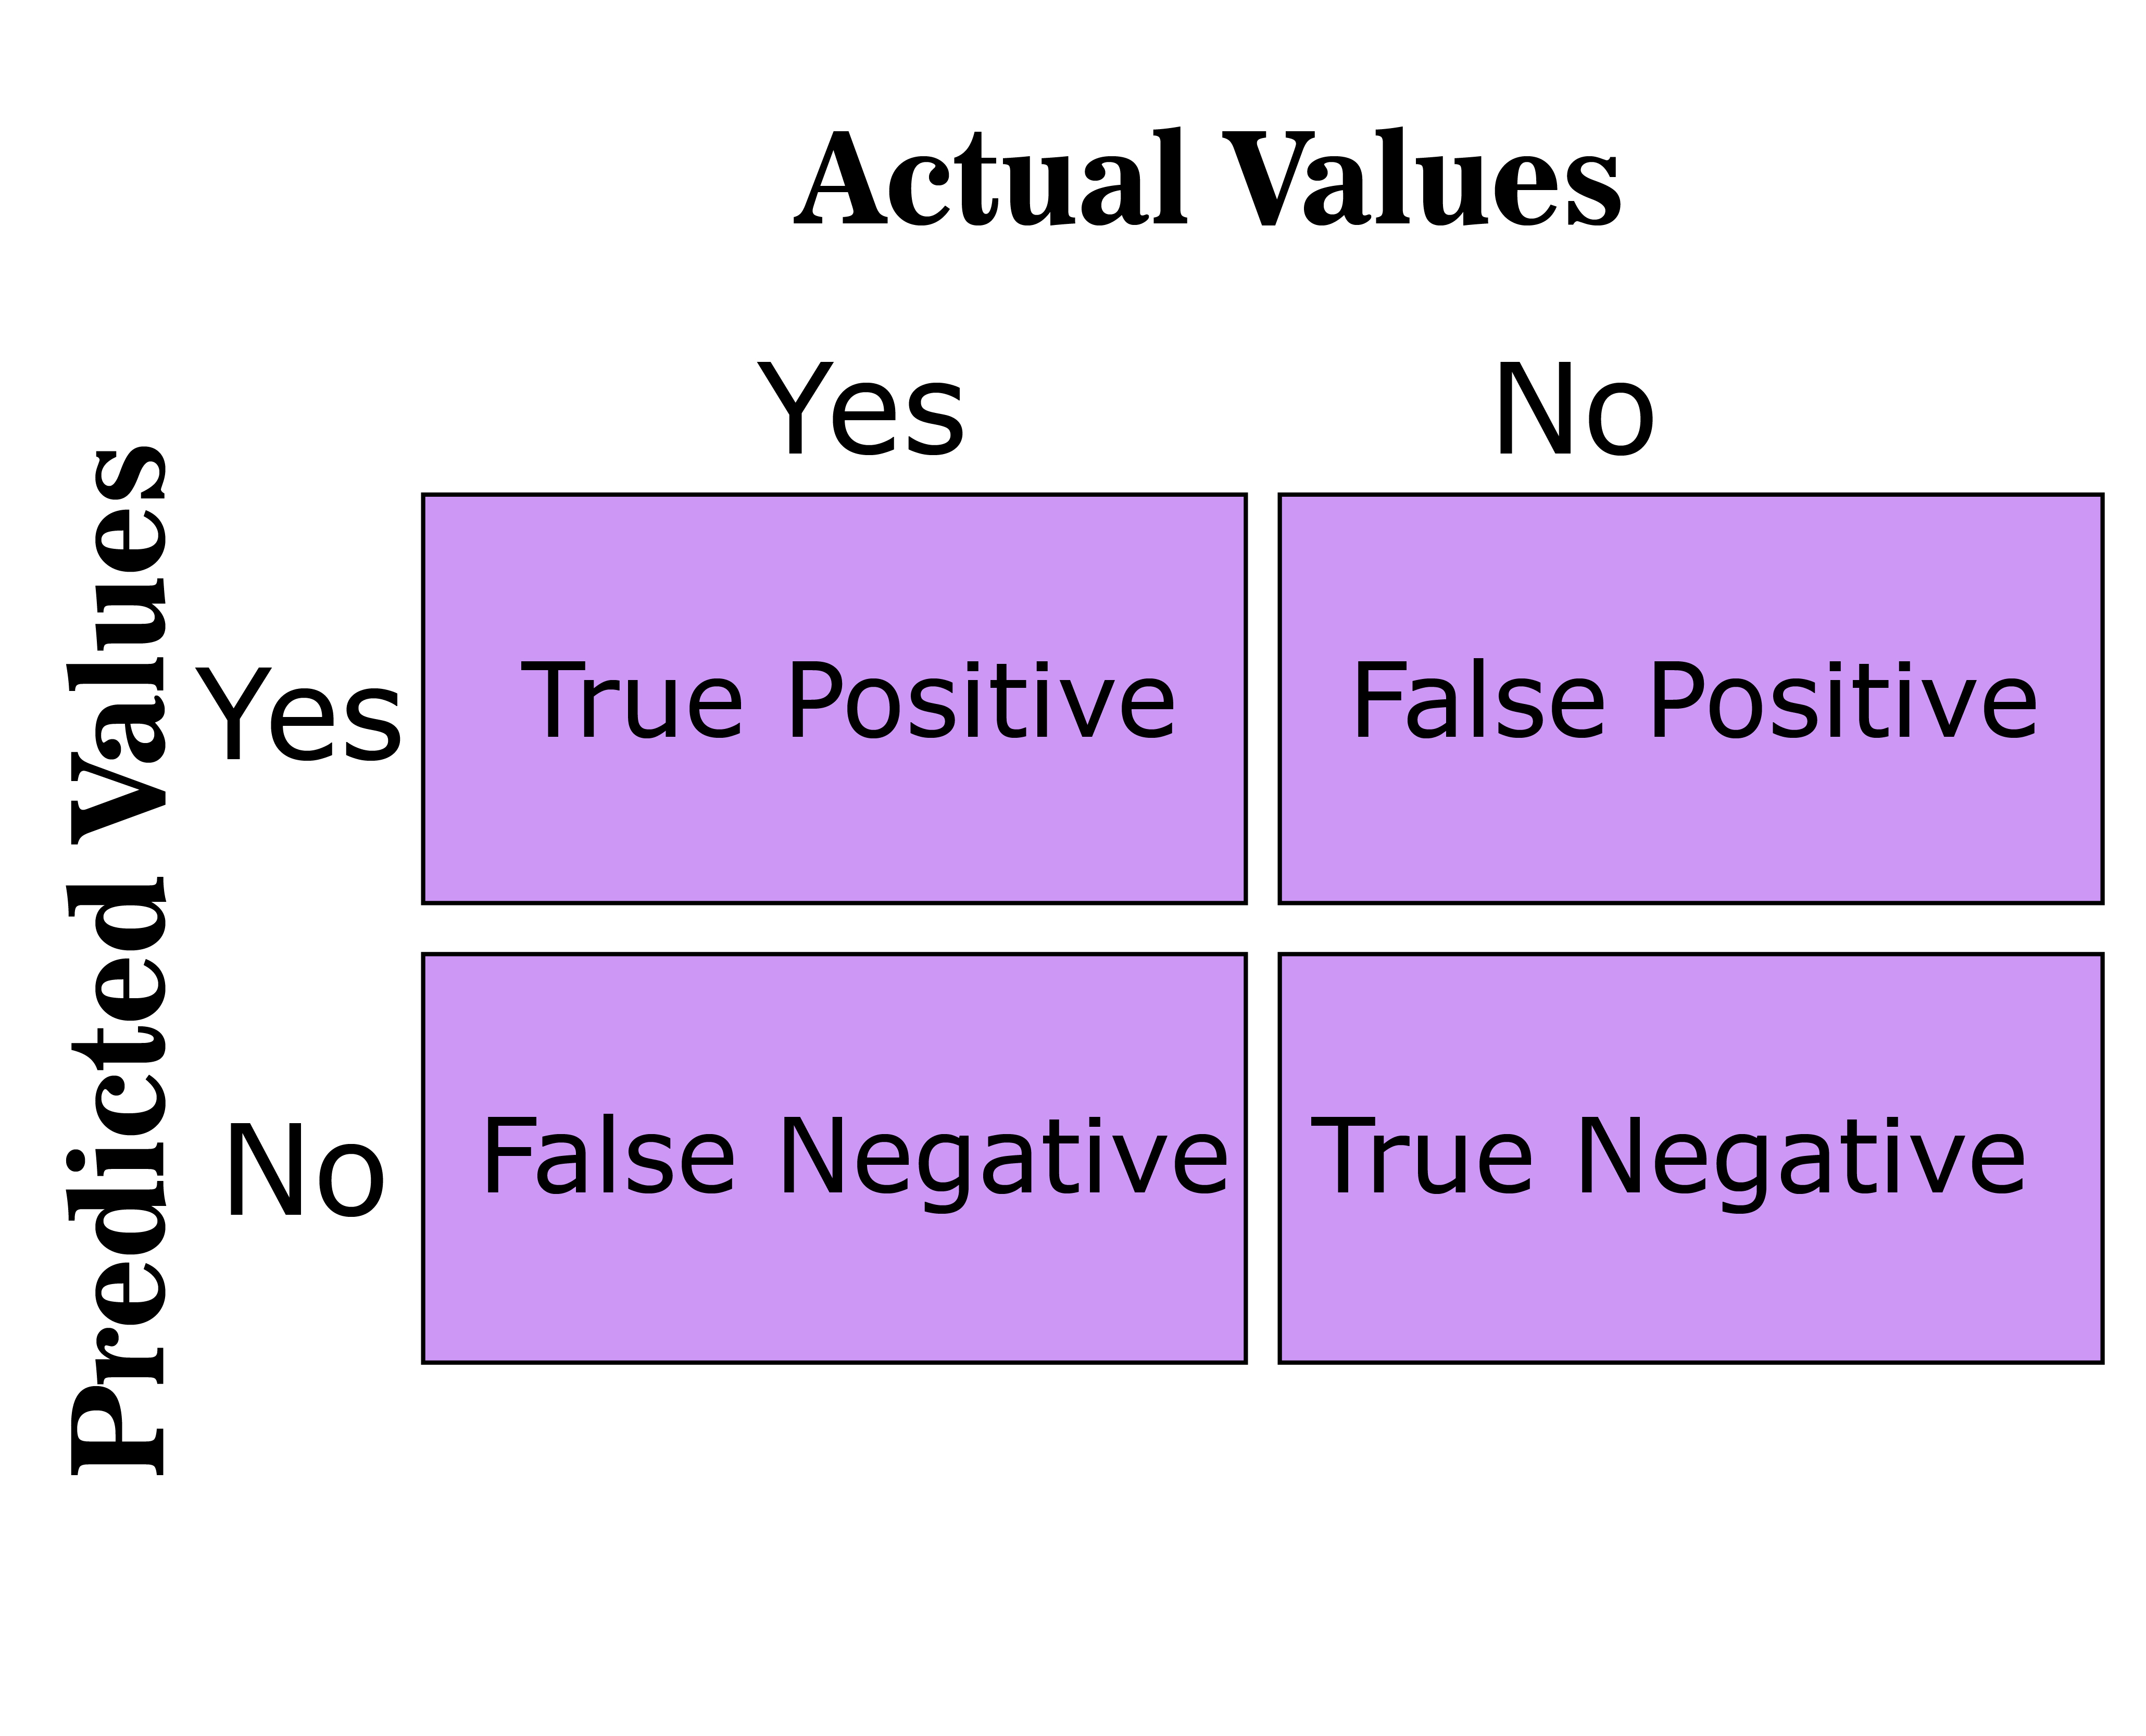

Remember that we have studied the binary type of logistic regression, where the 

1.   List item

1.   List item
2.   List item


2.   List item

outcome is either True, or False.

In this confusion matrix, the values are as follows -

True Positives - The values that were actually True and were predicted to be True as well
True Negatives - The values that were actually False and were predicted to be False as well
False Positives - The values that were actually False but were predicted to be True.
False Negatives - The values that were actually True but where predicted to be False.

Accuracy
The accuracy of a model is equal to -

True Positives + True Negatives / True Positives + True Negatives + False Positives + False Negatives


Let's see how a simple confusion matrix is formed.

[Text(0, 0.5, 'Not Sick'), Text(0, 1.5, 'Sick')]

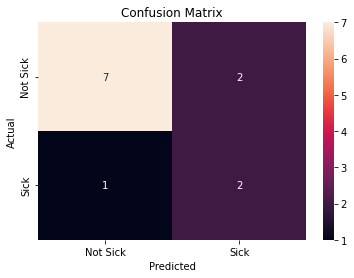

In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

actual_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick"]
predicted_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Sick", "Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Not Sick"]
labels = ["Not Sick", "Sick"]

cm = confusion_matrix(actual_data, predicted_data)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

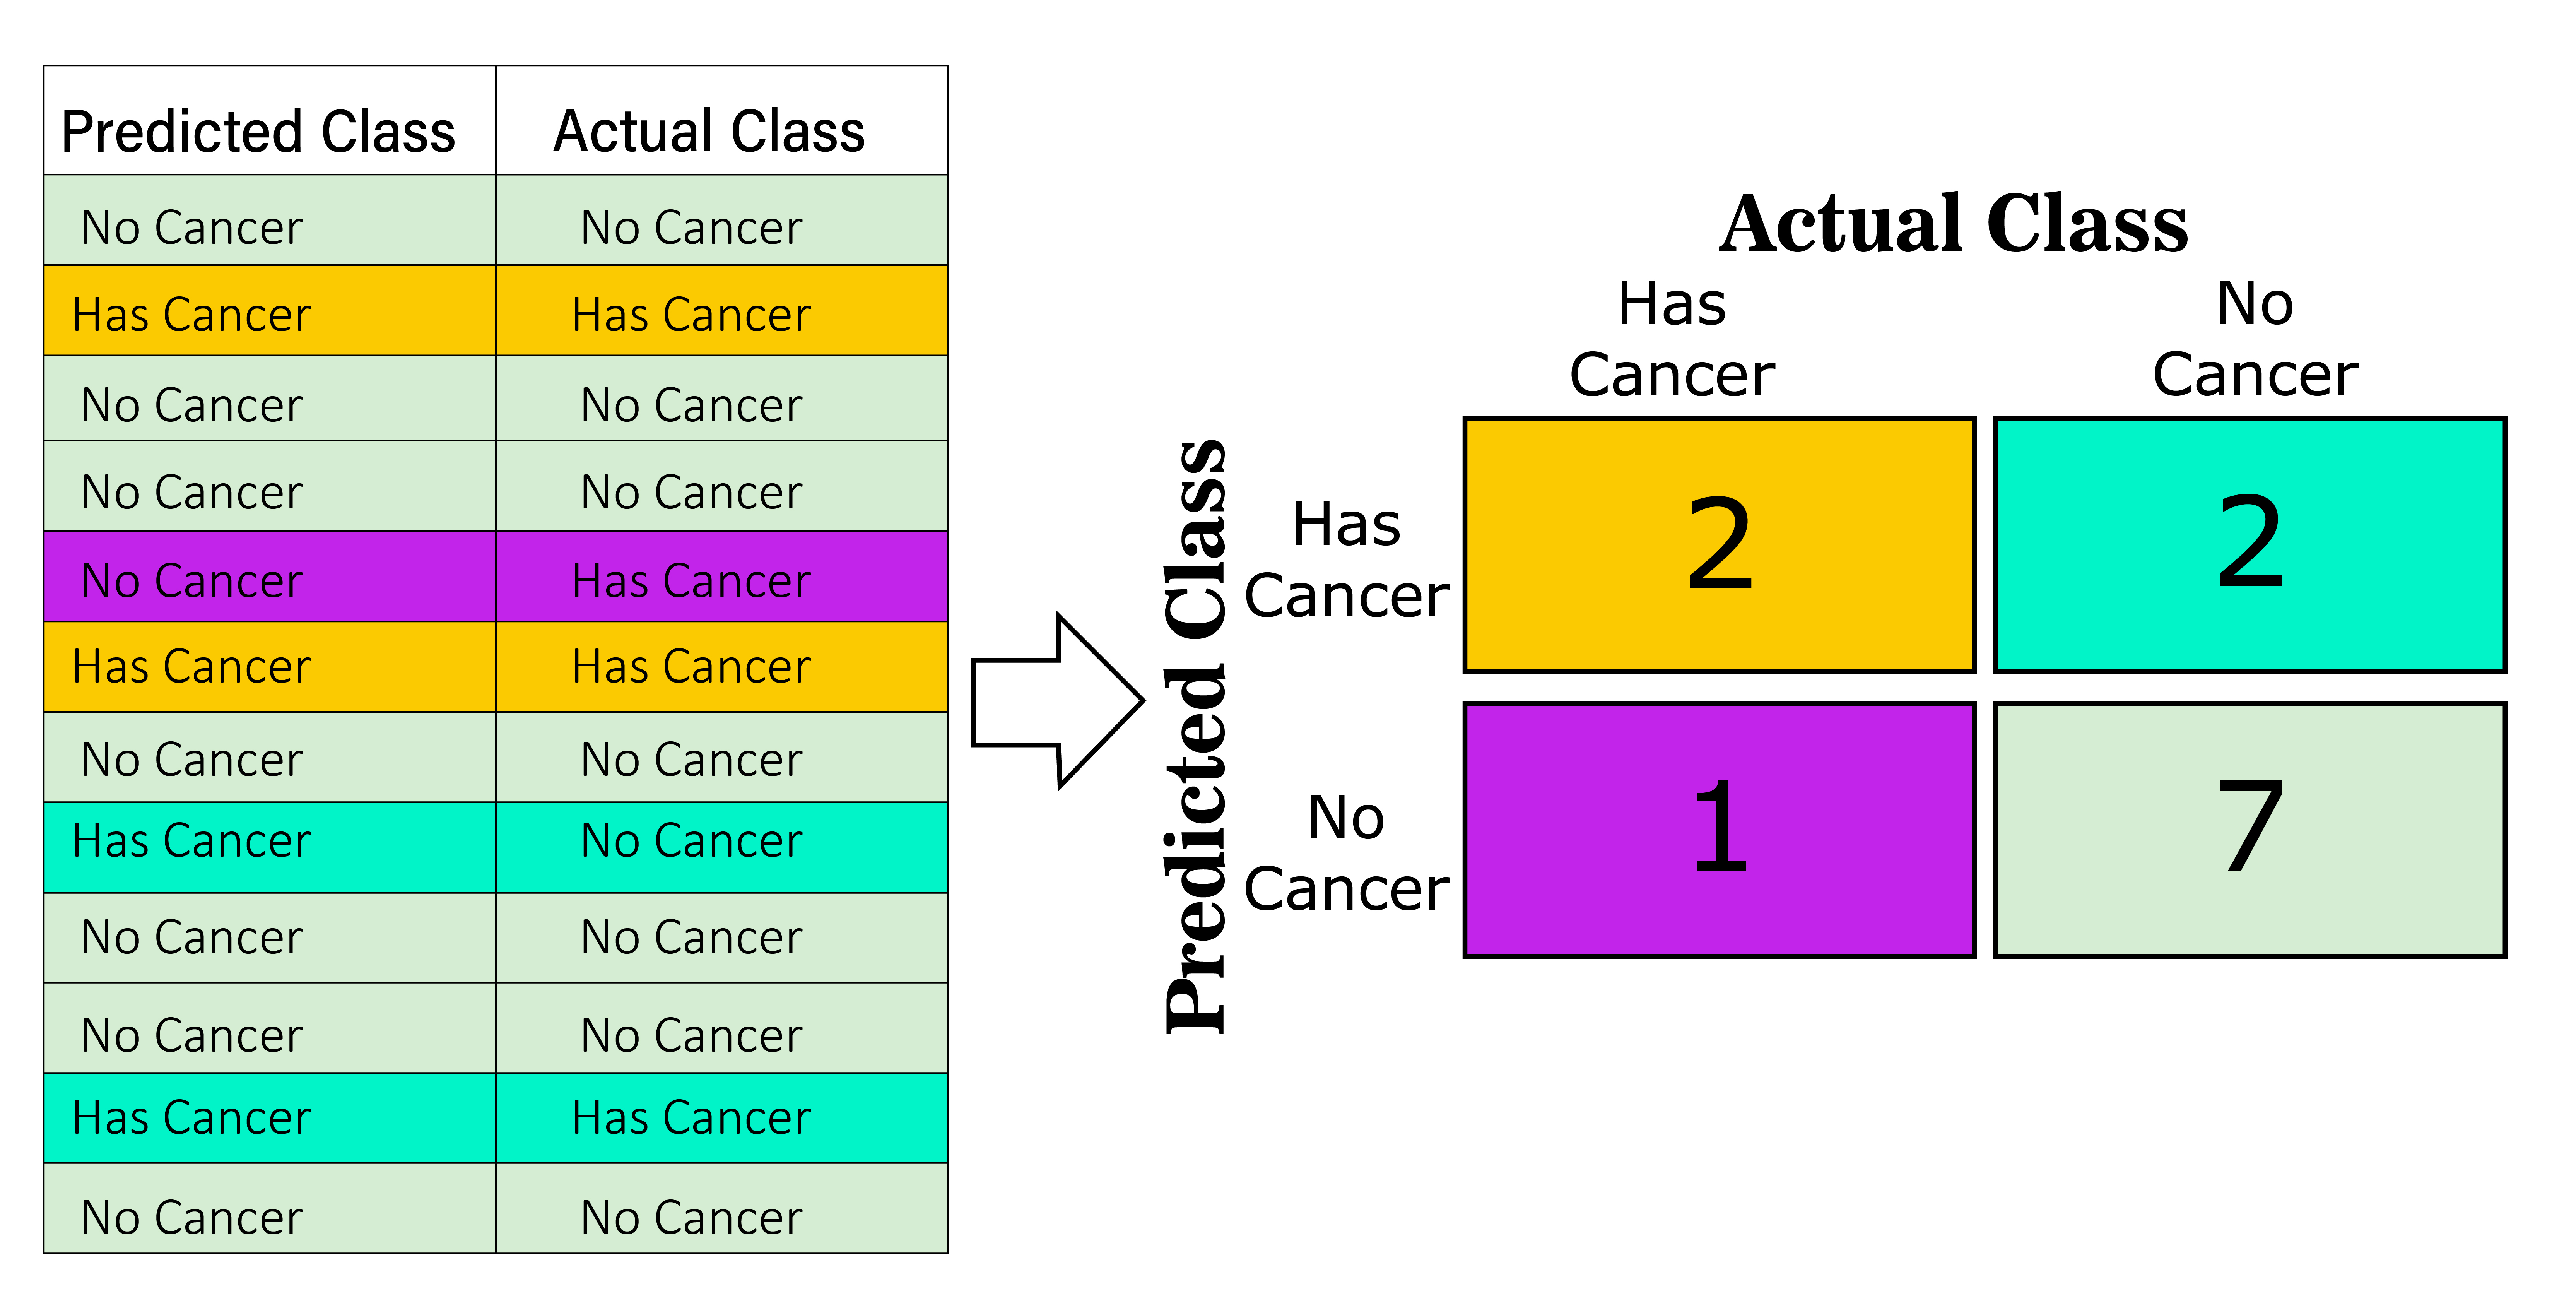

From here, we can see that there are 9 correct predictions and 3 incorrect predictions.


Let's calculate the accuracy and precision scores for this.

accuracy = 2 + 7 / 2 + 7 + 2 + 1

accuracy = 9 / 12

accuracy = 0.75

Now, let's take a dataset and perform some logistic regression on it to see the accuracy of our model with the confusion matrix.

In [2]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

Saving heart.csv to heart.csv


Let's see how the age of the person increases the list of a heart attack, by using single variable logistic regression.

In [3]:
import pandas as pd

df = pd.read_csv("heart.csv")

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
from sklearn.model_selection import train_test_split 

age = df["age"]
heart_attack = df["target"]

age_train, age_test, heart_attack_train, heart_attack_test = train_test_split(age, heart_attack, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(age_train.ravel(), (len(age_train), 1))
Y = np.reshape(heart_attack_train.ravel(), (len(heart_attack_train), 1))

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [6]:
X_test = np.reshape(age_test.ravel(), (len(age_test), 1))
Y_test = np.reshape(heart_attack_test.ravel(), (len(heart_attack_test), 1))

heart_attack_prediction = classifier.predict(X_test)

predicted_values = []
for i in heart_attack_prediction:
  if i == 0:
    predicted_values.append("No")
  else:
    predicted_values.append("Yes")

actual_values = []
for i in Y_test.ravel():
  if i == 0:
    actual_values.append("No")
  else:
    actual_values.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

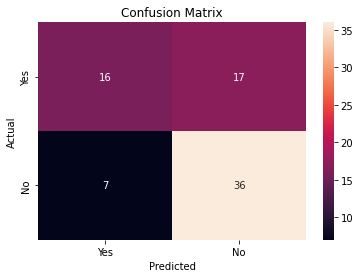

In [7]:
labels = ["Yes", "No"]

cm = confusion_matrix(actual_values, predicted_values)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

From here, we can see the following things -

36 People both actually got a heart attack and were predicted to get a heart attack.
16 People didn't get a heart attack and were also predicted to not get a heart attack.
7 People actually got a heart attack while they were not predicted to get one.
17 people were predicted to get a heart attack while they did not get one.

Our model has the accuracy as -

accuracy = 36 + 16 / 36 + 16 + 17 + 7

accuracy = 52 / 76

accuracy = 0.68421052631

What if we use more variables, instead of just age? Will our model's accuracy increase? Let's see!


In our data, cp stands for chest pain and chol stands for cholestrol. thalach stands for Maximum heart rate achieved. Let's include these along with the gender of the person.

In [9]:
factors = df[["age","sex","cp","chol","thalach"]]
heart_attack = df["target"]

factors_train,factors_test,heart_attack_train,heart_attack_test = train_test_split(factors,heart_attack,test_size=0.25,random_state=0)


In [10]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.transform(factors_test)


In [11]:
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(factors_train,heart_attack_train)


LogisticRegression(random_state=0)

In [12]:
heart_attack_prediction1 = classifier2.predict(factors_test)

predicted_values_1 = []
for i in heart_attack_prediction1:
  if i == 0:
    predicted_values_1.append("No")
  else:
    predicted_values_1.append("Yes")
  
actual_values_1 = []

for i in heart_attack_test.ravel():
  if i == 0:
    actual_values_1.append("No")
  else:
    actual_values_1.append("Yes")
    


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

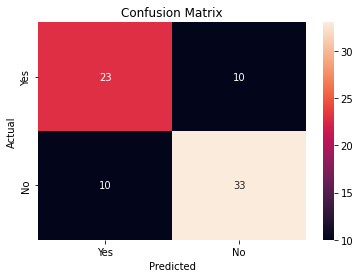

In [13]:
cm = confusion_matrix(actual_values_1,predicted_values_1)

ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels);ax.yaxis.set_ticklabels(labels)


33 people were got heart and predicted to get heart attack
23 people didnt get heart attack and were also predicted to not get a heart attcak
ten people actually got heart attack while they were not predicted to get
ten predicted people were predicted to get heart attack while they didnt get
so our model hast the accuracy as 
accuarcy = 33+23/33+23+10+10
accuarcy = 56/76
accuracy = 0.73



with a new model that ewe just build we have aa higher accuarcy to detect if a person will get a heart attack or not 